In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
import joblib
import sys
sys.path.append('C:/Users/thu-bao/Bachelorarbeit/3_Code/NYC_Yellow_Cab_Fare_Prediction/6_Helper_Function')
import Resampling

import tensorflow as tf
from tensorflow import keras

In [2]:
%matplotlib inline
pd.set_option('display.max_columns', None)

### Load transformed Data 

In [3]:
path_without="F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/7_Transformed_Data/Without_Feature_Engineering.parquet"
path_with="F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/7_Transformed_Data/With_Feature_Engineering.parquet"
path_with_external="F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/7_Transformed_Data/With_Feature_Engineering_External_Data.parquet"
# Testing the Parquet Files
data_without=pd.read_parquet(path=path_without,engine="fastparquet")
data_with=pd.read_parquet(path=path_with,engine="fastparquet")
data_with_external=pd.read_parquet(path=path_with_external,engine="fastparquet")

In [4]:
data_without.head()

,Fare_Rate,Pickup_Year_2009,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Year_2016,Pickup_Month_1,Pickup_Month_2,Pickup_Month_3,Pickup_Month_4,Pickup_Month_5,Pickup_Month_6,Pickup_Month_7,Pickup_Month_8,Pickup_Month_9,Pickup_Month_10,Pickup_Month_11,Pickup_Month_12,Pickup_Day_1,Pickup_Day_2,Pickup_Day_3,Pickup_Day_4,Pickup_Day_5,Pickup_Day_6,Pickup_Day_7,Pickup_Day_8,Pickup_Day_9,Pickup_Day_10,Pickup_Day_11,Pickup_Day_12,Pickup_Day_13,Pickup_Day_14,Pickup_Day_15,Pickup_Day_16,Pickup_Day_17,Pickup_Day_18,Pickup_Day_19,Pickup_Day_20,Pickup_Day_21,Pickup_Day_22,Pickup_Day_23,Pickup_Day_24,Pickup_Day_25,Pickup_Day_26,Pickup_Day_27,Pickup_Day_28,Pickup_Day_29,Pickup_Day_30,Pickup_Day_31,Pickup_Weekday_Friday,Pickup_Weekday_Monday,Pickup_Weekday_Saturday,Pickup_Weekday_Sunday,Pickup_Weekday_Thursday,Pickup_Weekday_Tuesday,Pickup_Weekday_Wednesday,Pickup_Hour_0,Pickup_Hour_1,Pickup_Hour_2,Pickup_Hour_3,Pickup_Hour_4,Pickup_Hour_5,Pickup_Hour_6,Pickup_Hour_7,Pickup_Hour_8,Pickup_Hour_9,Pickup_Hour_10,Pickup_Hour_11,Pickup_Hour_12,Pickup_Hour_13,Pickup_Hour_14,Pickup_Hour_15,Pickup_Hour_16,Pickup_Hour_17,Pickup_Hour_18,Pickup_Hour_19,Pickup_Hour_20,Pickup_Hour_21,Pickup_Hour_22,Pickup_Hour_23,borough_pickup_Bronx,borough_pickup_Brooklyn,borough_pickup_Manhattan,borough_pickup_Queens,borough_pickup_Staten Island
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
data_without.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906251 entries, 0 to 1999999
Data columns (total 88 columns):
Fare_Rate                       int32
Pickup_Year_2009                uint8
Pickup_Year_2010                uint8
Pickup_Year_2011                uint8
Pickup_Year_2012                uint8
Pickup_Year_2013                uint8
Pickup_Year_2014                uint8
Pickup_Year_2015                uint8
Pickup_Year_2016                uint8
Pickup_Month_1                  uint8
Pickup_Month_2                  uint8
Pickup_Month_3                  uint8
Pickup_Month_4                  uint8
Pickup_Month_5                  uint8
Pickup_Month_6                  uint8
Pickup_Month_7                  uint8
Pickup_Month_8                  uint8
Pickup_Month_9                  uint8
Pickup_Month_10                 uint8
Pickup_Month_11                 uint8
Pickup_Month_12                 uint8
Pickup_Day_1                    uint8
Pickup_Day_2                    uint8
Pickup_Day_3 

In [6]:
data_with.head()

,Distance_to_JFK_Airport,Distance_to_Newark_Airport,Distance_to_Rossville_Woodrow,Distance_to_rockaway_park,Fare_Rate,borough_pickup_Bronx,borough_pickup_Brooklyn,borough_pickup_Manhattan,borough_pickup_Queens,borough_pickup_Staten Island,Pickup_Year_2009,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Year_2016,Pickup_Month_1,Pickup_Month_2,Pickup_Month_3,Pickup_Month_4,Pickup_Month_5,Pickup_Month_6,Pickup_Month_7,Pickup_Month_8,Pickup_Month_9,Pickup_Month_10,Pickup_Month_11,Pickup_Month_12,Pickup_Day_1,Pickup_Day_2,Pickup_Day_3,Pickup_Day_4,Pickup_Day_5,Pickup_Day_6,Pickup_Day_7,Pickup_Day_8,Pickup_Day_9,Pickup_Day_10,Pickup_Day_11,Pickup_Day_12,Pickup_Day_13,Pickup_Day_14,Pickup_Day_15,Pickup_Day_16,Pickup_Day_17,Pickup_Day_18,Pickup_Day_19,Pickup_Day_20,Pickup_Day_21,Pickup_Day_22,Pickup_Day_23,Pickup_Day_24,Pickup_Day_25,Pickup_Day_26,Pickup_Day_27,Pickup_Day_28,Pickup_Day_29,Pickup_Day_30,Pickup_Day_31,Pickup_Weekday_Friday,Pickup_Weekday_Monday,Pickup_Weekday_Saturday,Pickup_Weekday_Sunday,Pickup_Weekday_Thursday,Pickup_Weekday_Tuesday,Pickup_Weekday_Wednesday,Pickup_Hour_0,Pickup_Hour_1,Pickup_Hour_2,Pickup_Hour_3,Pickup_Hour_4,Pickup_Hour_5,Pickup_Hour_6,Pickup_Hour_7,Pickup_Hour_8,Pickup_Hour_9,Pickup_Hour_10,Pickup_Hour_11,Pickup_Hour_12,Pickup_Hour_13,Pickup_Hour_14,Pickup_Hour_15,Pickup_Hour_16,Pickup_Hour_17,Pickup_Hour_18,Pickup_Hour_19,Pickup_Hour_20,Pickup_Hour_21,Pickup_Hour_22,Pickup_Hour_23,Pickup_Is_Area_Lower_Midtown_Manhattan_False,Pickup_Is_Area_Lower_Midtown_Manhattan_True,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Time_Of_Day_Afternoon,Time_Of_Day_Evening,Time_Of_Day_Morning,Time_Of_Day_Night,Rush_Hour_False,Rush_Hour_True
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.507171,0.335439,0.540175,0.574413,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
1,0.527215,0.378676,0.585389,0.618281,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2,0.522671,0.385412,0.588856,0.615114,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1
3,0.510134,0.434253,0.621838,0.617592,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1
4,0.556699,0.364207,0.585772,0.649559,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0


In [7]:
data_with.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906251 entries, 0 to 1999999
Columns: 104 entries, Distance_to_JFK_Airport to Rush_Hour_True
dtypes: float32(4), int32(1), uint8(99)
memory usage: 230.9 MB


In [8]:
data_with_external.head()

,Distance_to_JFK_Airport,Distance_to_Newark_Airport,Distance_to_Rossville_Woodrow,Distance_to_rockaway_park,Fare_Rate,borough_pickup_Bronx,borough_pickup_Brooklyn,borough_pickup_Manhattan,borough_pickup_Queens,borough_pickup_Staten Island,Pickup_Year_2009,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Year_2016,Pickup_Month_1,Pickup_Month_2,Pickup_Month_3,Pickup_Month_4,Pickup_Month_5,Pickup_Month_6,Pickup_Month_7,Pickup_Month_8,Pickup_Month_9,Pickup_Month_10,Pickup_Month_11,Pickup_Month_12,Pickup_Day_1,Pickup_Day_2,Pickup_Day_3,Pickup_Day_4,Pickup_Day_5,Pickup_Day_6,Pickup_Day_7,Pickup_Day_8,Pickup_Day_9,Pickup_Day_10,Pickup_Day_11,Pickup_Day_12,Pickup_Day_13,Pickup_Day_14,Pickup_Day_15,Pickup_Day_16,Pickup_Day_17,Pickup_Day_18,Pickup_Day_19,Pickup_Day_20,Pickup_Day_21,Pickup_Day_22,Pickup_Day_23,Pickup_Day_24,Pickup_Day_25,Pickup_Day_26,Pickup_Day_27,Pickup_Day_28,Pickup_Day_29,Pickup_Day_30,Pickup_Day_31,Pickup_Weekday_Friday,Pickup_Weekday_Monday,Pickup_Weekday_Saturday,Pickup_Weekday_Sunday,Pickup_Weekday_Thursday,Pickup_Weekday_Tuesday,Pickup_Weekday_Wednesday,Pickup_Hour_0,Pickup_Hour_1,Pickup_Hour_2,Pickup_Hour_3,Pickup_Hour_4,Pickup_Hour_5,Pickup_Hour_6,Pickup_Hour_7,Pickup_Hour_8,Pickup_Hour_9,Pickup_Hour_10,Pickup_Hour_11,Pickup_Hour_12,Pickup_Hour_13,Pickup_Hour_14,Pickup_Hour_15,Pickup_Hour_16,Pickup_Hour_17,Pickup_Hour_18,Pickup_Hour_19,Pickup_Hour_20,Pickup_Hour_21,Pickup_Hour_22,Pickup_Hour_23,Pickup_Is_Area_Lower_Midtown_Manhattan_False,Pickup_Is_Area_Lower_Midtown_Manhattan_True,Fog_0,Fog_1,High_Wind_0,High_Wind_1,Rain_0,Rain_1,Snow_0,Snow_1,Holiday_False,Holiday_True,Temperature_cool,Temperature_hot,Temperature_little cool,Temperature_little warm,Temperature_pleasant,Temperature_warm,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Time_Of_Day_Afternoon,Time_Of_Day_Evening,Time_Of_Day_Morning,Time_Of_Day_Night,Rush_Hour_False,Rush_Hour_True
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.507171,0.335439,0.540175,0.574413,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
1,0.527215,0.378676,0.585389,0.618281,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
2,0.522671,0.385412,0.588856,0.615114,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
3,0.510134,0.434253,0.621838,0.617592,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1
4,0.556699,0.364207,0.585772,0.649559,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0


In [9]:
data_with_external.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906251 entries, 0 to 1999999
Columns: 120 entries, Distance_to_JFK_Airport to Rush_Hour_True
dtypes: float32(4), int32(1), uint8(115)
memory usage: 260.0 MB


In [10]:
data_without.describe()

,Fare_Rate,Pickup_Year_2009,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Year_2016,Pickup_Month_1,Pickup_Month_2,Pickup_Month_3,Pickup_Month_4,Pickup_Month_5,Pickup_Month_6,Pickup_Month_7,Pickup_Month_8,Pickup_Month_9,Pickup_Month_10,Pickup_Month_11,Pickup_Month_12,Pickup_Day_1,Pickup_Day_2,Pickup_Day_3,Pickup_Day_4,Pickup_Day_5,Pickup_Day_6,Pickup_Day_7,Pickup_Day_8,Pickup_Day_9,Pickup_Day_10,Pickup_Day_11,Pickup_Day_12,Pickup_Day_13,Pickup_Day_14,Pickup_Day_15,Pickup_Day_16,Pickup_Day_17,Pickup_Day_18,Pickup_Day_19,Pickup_Day_20,Pickup_Day_21,Pickup_Day_22,Pickup_Day_23,Pickup_Day_24,Pickup_Day_25,Pickup_Day_26,Pickup_Day_27,Pickup_Day_28,Pickup_Day_29,Pickup_Day_30,Pickup_Day_31,Pickup_Weekday_Friday,Pickup_Weekday_Monday,Pickup_Weekday_Saturday,Pickup_Weekday_Sunday,Pickup_Weekday_Thursday,Pickup_Weekday_Tuesday,Pickup_Weekday_Wednesday,Pickup_Hour_0,Pickup_Hour_1,Pickup_Hour_2,Pickup_Hour_3,Pickup_Hour_4,Pickup_Hour_5,Pickup_Hour_6,Pickup_Hour_7,Pickup_Hour_8,Pickup_Hour_9,Pickup_Hour_10,Pickup_Hour_11,Pickup_Hour_12,Pickup_Hour_13,Pickup_Hour_14,Pickup_Hour_15,Pickup_Hour_16,Pickup_Hour_17,Pickup_Hour_18,Pickup_Hour_19,Pickup_Hour_20,Pickup_Hour_21,Pickup_Hour_22,Pickup_Hour_23,borough_pickup_Bronx,borough_pickup_Brooklyn,borough_pickup_Manhattan,borough_pickup_Queens,borough_pickup_Staten Island
count,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06
mean,1.271981e+00,1.251178e-01,1.238373e-01,1.219540e-01,1.234843e-01,1.256875e-01,1.259881e-01,1.268437e-01,1.270871e-01,9.294789e-02,8.971326e-02,9.944441e-02,9.733293e-02,9.883431e-02,9.409044e-02,7.113072e-02,6.666436e-02,7.181373e-02,7.541819e-02,7.116482e-02,7.144495e-02,3.124562e-02,3.126556e-02,3.149690e-02,3.193703e-02,3.244274e-02,3.269349e-02,3.285874e-02,3.344208e-02,3.369074e-02,3.352864e-02,3.367605e-02,3.422844e-02,3.416811e-02,3.401598e-02,3.409152e-02,3.393729e-02,3.391683e-02,3.362883e-02,3.408995e-02,3.395513e-02,3.346097e-02,3.325270e-02,3.265729e-02,3.233520e-02,3.142031e-02,3.157664e-02,3.126189e-02,3.173454e-02,3.019382e-02,2.923015e-02,1.856681e-02,1.535307e-01,1.280414e-01,1.518221e-01,1.309067e-01,1.502766e-01,1.404338e-01,1.449888e-01,3.893768e-02,2.854031e-02,2.143946e-02,1.564065e-02,1.119685e-02,9.533372e-03,2.062163e-02,3.672864e-02,4.546044e-02,4.676561e-02,4.523696e-02,4.663394e-02,4.908430e-02,4.930830e-02,5.050594e-02,4.814948e-02,4.179145e-02,4.998030e-02,6.046948e-02,6.293872e-02,5.875459e-02,5.746882e-02,5.550843e-02,4.930463e-02,6.861636e-04,2.073651e-02,9.307767e-01,4.777230e-02,2.832785e-05
std,5.299891e-01,3.308526e-01,3.293959e-01,3.272328e-01,3.289923e-01,3.314970e-01,3.318361e-01,3.327979e-01,3.330707e-01,2.903595e-01,2.857706e-01,2.992579e-01,2.964107e-01,2.984395e-01,2.919546e-01,2.570431e-01,2.494399e-01,2.581793e-01,2.640650e-01,2.571000e-01,2.575667e-01,1.739809e-01,1.740346e-01,1.746564e-

In [11]:
data_with.describe()

,Distance_to_JFK_Airport,Distance_to_Newark_Airport,Distance_to_Rossville_Woodrow,Distance_to_rockaway_park,Fare_Rate,borough_pickup_Bronx,borough_pickup_Brooklyn,borough_pickup_Manhattan,borough_pickup_Queens,borough_pickup_Staten Island,Pickup_Year_2009,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Year_2016,Pickup_Month_1,Pickup_Month_2,Pickup_Month_3,Pickup_Month_4,Pickup_Month_5,Pickup_Month_6,Pickup_Month_7,Pickup_Month_8,Pickup_Month_9,Pickup_Month_10,Pickup_Month_11,Pickup_Month_12,Pickup_Day_1,Pickup_Day_2,Pickup_Day_3,Pickup_Day_4,Pickup_Day_5,Pickup_Day_6,Pickup_Day_7,Pickup_Day_8,Pickup_Day_9,Pickup_Day_10,Pickup_Day_11,Pickup_Day_12,Pickup_Day_13,Pickup_Day_14,Pickup_Day_15,Pickup_Day_16,Pickup_Day_17,Pickup_Day_18,Pickup_Day_19,Pickup_Day_20,Pickup_Day_21,Pickup_Day_22,Pickup_Day_23,Pickup_Day_24,Pickup_Day_25,Pickup_Day_26,Pickup_Day_27,Pickup_Day_28,Pickup_Day_29,Pickup_Day_30,Pickup_Day_31,Pickup_Weekday_Friday,Pickup_Weekday_Monday,Pickup_Weekday_Saturday,Pickup_Weekday_Sunday,Pickup_Weekday_Thursday,Pickup_Weekday_Tuesday,Pickup_Weekday_Wednesday,Pickup_Hour_0,Pickup_Hour_1,Pickup_Hour_2,Pickup_Hour_3,Pickup_Hour_4,Pickup_Hour_5,Pickup_Hour_6,Pickup_Hour_7,Pickup_Hour_8,Pickup_Hour_9,Pickup_Hour_10,Pickup_Hour_11,Pickup_Hour_12,Pickup_Hour_13,Pickup_Hour_14,Pickup_Hour_15,Pickup_Hour_16,Pickup_Hour_17,Pickup_Hour_18,Pickup_Hour_19,Pickup_Hour_20,Pickup_Hour_21,Pickup_Hour_22,Pickup_Hour_23,Pickup_Is_Area_Lower_Midtown_Manhattan_False,Pickup_Is_Area_Lower_Midtown_Manhattan_True,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Time_Of_Day_Afternoon,Time_Of_Day_Evening,Time_Of_Day_Morning,Time_Of_Day_Night,Rush_Hour_False,Rush_Hour_True
count,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06
mean,5.094723e-01,3.689633e-01,5.655964e-01,5.894019e-01,1.271981e+00,6.861636e-04,2.073651e-02,9.307767e-01,4.777230e-02,2.832785e-05,1.251178e-01,1.238373e-01,1.219540e-01,1.234843e-01,1.256875e-01,1.259881e-01,1.268437e-01,1.270871e-01,9.294789e-02,8.971326e-02,9.944441e-02,9.733293e-02,9.883431e-02,9.409044e-02,7.113072e-02,6.666436e-02,7.181373e-02,7.541819e-02,7.116482e-02,7.144495e-02,3.124562e-02,3.126556e-02,3.149690e-02,3.193703e-02,3.244274e-02,3.269349e-02,3.285874e-02,3.344208e-02,3.369074e-02,3.352864e-02,3.367605e-02,3.422844e-02,3.416811e-02,3.401598e-02,3.409152e-02,3.393729e-02,3.391683e-02,3.362883e-02,3.408995e-02,3.395513e-02,3.346097e-02,3.325270e-02,3.265729e-02,3.233520e-02,3.142031e-02,3.157664e-02,3.126189e-02,3.173454e-02,3.019382e-02,2.923015e-02,1.856681e-02,1.535307e-01,1.280414e-01,1.518221e-01,1.309067e-01,1.502766e-01,1.404338e-01,1.449888e-01,3.

In [12]:
data_with_external.describe()

,Distance_to_JFK_Airport,Distance_to_Newark_Airport,Distance_to_Rossville_Woodrow,Distance_to_rockaway_park,Fare_Rate,borough_pickup_Bronx,borough_pickup_Brooklyn,borough_pickup_Manhattan,borough_pickup_Queens,borough_pickup_Staten Island,Pickup_Year_2009,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Year_2016,Pickup_Month_1,Pickup_Month_2,Pickup_Month_3,Pickup_Month_4,Pickup_Month_5,Pickup_Month_6,Pickup_Month_7,Pickup_Month_8,Pickup_Month_9,Pickup_Month_10,Pickup_Month_11,Pickup_Month_12,Pickup_Day_1,Pickup_Day_2,Pickup_Day_3,Pickup_Day_4,Pickup_Day_5,Pickup_Day_6,Pickup_Day_7,Pickup_Day_8,Pickup_Day_9,Pickup_Day_10,Pickup_Day_11,Pickup_Day_12,Pickup_Day_13,Pickup_Day_14,Pickup_Day_15,Pickup_Day_16,Pickup_Day_17,Pickup_Day_18,Pickup_Day_19,Pickup_Day_20,Pickup_Day_21,Pickup_Day_22,Pickup_Day_23,Pickup_Day_24,Pickup_Day_25,Pickup_Day_26,Pickup_Day_27,Pickup_Day_28,Pickup_Day_29,Pickup_Day_30,Pickup_Day_31,Pickup_Weekday_Friday,Pickup_Weekday_Monday,Pickup_Weekday_Saturday,Pickup_Weekday_Sunday,Pickup_Weekday_Thursday,Pickup_Weekday_Tuesday,Pickup_Weekday_Wednesday,Pickup_Hour_0,Pickup_Hour_1,Pickup_Hour_2,Pickup_Hour_3,Pickup_Hour_4,Pickup_Hour_5,Pickup_Hour_6,Pickup_Hour_7,Pickup_Hour_8,Pickup_Hour_9,Pickup_Hour_10,Pickup_Hour_11,Pickup_Hour_12,Pickup_Hour_13,Pickup_Hour_14,Pickup_Hour_15,Pickup_Hour_16,Pickup_Hour_17,Pickup_Hour_18,Pickup_Hour_19,Pickup_Hour_20,Pickup_Hour_21,Pickup_Hour_22,Pickup_Hour_23,Pickup_Is_Area_Lower_Midtown_Manhattan_False,Pickup_Is_Area_Lower_Midtown_Manhattan_True,Fog_0,Fog_1,High_Wind_0,High_Wind_1,Rain_0,Rain_1,Snow_0,Snow_1,Holiday_False,Holiday_True,Temperature_cool,Temperature_hot,Temperature_little cool,Temperature_little warm,Temperature_pleasant,Temperature_warm,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Time_Of_Day_Afternoon,Time_Of_Day_Evening,Time_Of_Day_Morning,Time_Of_Day_Night,Rush_Hour_False,Rush_Hour_True
count,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06,1.906251e+06
mean,5.094723e-01,3.689633e-01,5.655964e-01,5.894019e-01,1.271981e+00,6.861636e-04,2.073651e-02,9.307767e-01,4.777230e-02,2.832785e-05,1.251178e-01,1.238373e-01,1.219540e-01,1.234843e-01,1.256875e-01,1.259881e-01,1.268437e-01,1.270871e-01,9.294789e-02,8.971326e-02,9.944441e-02,9.733293e-02,9.883431e-02,9.409044e-02,7.113072e-02,6.666436e-02,7.181373e-02,7.541819e-02,7.116482e-02,7.144495e-02,3.124562e-02,3.126556e-02,3.149690e-02,3.193703e-02,3.244274e-02,3.269349e-02,

In [13]:
# Create Training and Testset for the 3 Datasets
X_train_without, X_test_without, y_train_without, y_test_without = train_test_split(data_without.drop(columns=["Fare_Rate"]), data_without["Fare_Rate"], test_size=0.2, random_state=1)
X_train_with, X_test_with, y_train_with, y_test_with = train_test_split(data_with.drop(columns=["Fare_Rate"]), data_with["Fare_Rate"], test_size=0.2, random_state=1)
X_train_with_external, X_test_with_external, y_train_with_external, y_test_with_external = train_test_split(data_with_external.drop(columns=["Fare_Rate"]), data_with_external["Fare_Rate"], test_size=0.2, random_state=1)

In [14]:
X_train_without.head()

,Pickup_Year_2009,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Year_2016,Pickup_Month_1,Pickup_Month_2,Pickup_Month_3,Pickup_Month_4,Pickup_Month_5,Pickup_Month_6,Pickup_Month_7,Pickup_Month_8,Pickup_Month_9,Pickup_Month_10,Pickup_Month_11,Pickup_Month_12,Pickup_Day_1,Pickup_Day_2,Pickup_Day_3,Pickup_Day_4,Pickup_Day_5,Pickup_Day_6,Pickup_Day_7,Pickup_Day_8,Pickup_Day_9,Pickup_Day_10,Pickup_Day_11,Pickup_Day_12,Pickup_Day_13,Pickup_Day_14,Pickup_Day_15,Pickup_Day_16,Pickup_Day_17,Pickup_Day_18,Pickup_Day_19,Pickup_Day_20,Pickup_Day_21,Pickup_Day_22,Pickup_Day_23,Pickup_Day_24,Pickup_Day_25,Pickup_Day_26,Pickup_Day_27,Pickup_Day_28,Pickup_Day_29,Pickup_Day_30,Pickup_Day_31,Pickup_Weekday_Friday,Pickup_Weekday_Monday,Pickup_Weekday_Saturday,Pickup_Weekday_Sunday,Pickup_Weekday_Thursday,Pickup_Weekday_Tuesday,Pickup_Weekday_Wednesday,Pickup_Hour_0,Pickup_Hour_1,Pickup_Hour_2,Pickup_Hour_3,Pickup_Hour_4,Pickup_Hour_5,Pickup_Hour_6,Pickup_Hour_7,Pickup_Hour_8,Pickup_Hour_9,Pickup_Hour_10,Pickup_Hour_11,Pickup_Hour_12,Pickup_Hour_13,Pickup_Hour_14,Pickup_Hour_15,Pickup_Hour_16,Pickup_Hour_17,Pickup_Hour_18,Pickup_Hour_19,Pickup_Hour_20,Pickup_Hour_21,Pickup_Hour_22,Pickup_Hour_23,borough_pickup_Bronx,borough_pickup_Brooklyn,borough_pickup_Manhattan,borough_pickup_Queens,borough_pickup_Staten Island
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1289735,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1953148,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1576669,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1545940,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1551811,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [15]:
X_train_with.head()

,Distance_to_JFK_Airport,Distance_to_Newark_Airport,Distance_to_Rossville_Woodrow,Distance_to_rockaway_park,borough_pickup_Bronx,borough_pickup_Brooklyn,borough_pickup_Manhattan,borough_pickup_Queens,borough_pickup_Staten Island,Pickup_Year_2009,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Year_2016,Pickup_Month_1,Pickup_Month_2,Pickup_Month_3,Pickup_Month_4,Pickup_Month_5,Pickup_Month_6,Pickup_Month_7,Pickup_Month_8,Pickup_Month_9,Pickup_Month_10,Pickup_Month_11,Pickup_Month_12,Pickup_Day_1,Pickup_Day_2,Pickup_Day_3,Pickup_Day_4,Pickup_Day_5,Pickup_Day_6,Pickup_Day_7,Pickup_Day_8,Pickup_Day_9,Pickup_Day_10,Pickup_Day_11,Pickup_Day_12,Pickup_Day_13,Pickup_Day_14,Pickup_Day_15,Pickup_Day_16,Pickup_Day_17,Pickup_Day_18,Pickup_Day_19,Pickup_Day_20,Pickup_Day_21,Pickup_Day_22,Pickup_Day_23,Pickup_Day_24,Pickup_Day_25,Pickup_Day_26,Pickup_Day_27,Pickup_Day_28,Pickup_Day_29,Pickup_Day_30,Pickup_Day_31,Pickup_Weekday_Friday,Pickup_Weekday_Monday,Pickup_Weekday_Saturday,Pickup_Weekday_Sunday,Pickup_Weekday_Thursday,Pickup_Weekday_Tuesday,Pickup_Weekday_Wednesday,Pickup_Hour_0,Pickup_Hour_1,Pickup_Hour_2,Pickup_Hour_3,Pickup_Hour_4,Pickup_Hour_5,Pickup_Hour_6,Pickup_Hour_7,Pickup_Hour_8,Pickup_Hour_9,Pickup_Hour_10,Pickup_Hour_11,Pickup_Hour_12,Pickup_Hour_13,Pickup_Hour_14,Pickup_Hour_15,Pickup_Hour_16,Pickup_Hour_17,Pickup_Hour_18,Pickup_Hour_19,Pickup_Hour_20,Pickup_Hour_21,Pickup_Hour_22,Pickup_Hour_23,Pickup_Is_Area_Lower_Midtown_Manhattan_False,Pickup_Is_Area_Lower_Midtown_Manhattan_True,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Time_Of_Day_Afternoon,Time_Of_Day_Evening,Time_Of_Day_Morning,Time_Of_Day_Night,Rush_Hour_False,Rush_Hour_True
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1289735,0.515247,0.334713,0.543707,0.585104,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
1953148,0.547175,0.391882,0.603357,0.647555,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
1576669,0.570682,0.399345,0.617221,0.678045,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
1545940,0.551097,0.397188,0.608795,0.654085,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0
1551811,0.513865,0.388264,0.587484,0.605127,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0


In [16]:
X_train_with_external.head()

,Distance_to_JFK_Airport,Distance_to_Newark_Airport,Distance_to_Rossville_Woodrow,Distance_to_rockaway_park,borough_pickup_Bronx,borough_pickup_Brooklyn,borough_pickup_Manhattan,borough_pickup_Queens,borough_pickup_Staten Island,Pickup_Year_2009,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Year_2016,Pickup_Month_1,Pickup_Month_2,Pickup_Month_3,Pickup_Month_4,Pickup_Month_5,Pickup_Month_6,Pickup_Month_7,Pickup_Month_8,Pickup_Month_9,Pickup_Month_10,Pickup_Month_11,Pickup_Month_12,Pickup_Day_1,Pickup_Day_2,Pickup_Day_3,Pickup_Day_4,Pickup_Day_5,Pickup_Day_6,Pickup_Day_7,Pickup_Day_8,Pickup_Day_9,Pickup_Day_10,Pickup_Day_11,Pickup_Day_12,Pickup_Day_13,Pickup_Day_14,Pickup_Day_15,Pickup_Day_16,Pickup_Day_17,Pickup_Day_18,Pickup_Day_19,Pickup_Day_20,Pickup_Day_21,Pickup_Day_22,Pickup_Day_23,Pickup_Day_24,Pickup_Day_25,Pickup_Day_26,Pickup_Day_27,Pickup_Day_28,Pickup_Day_29,Pickup_Day_30,Pickup_Day_31,Pickup_Weekday_Friday,Pickup_Weekday_Monday,Pickup_Weekday_Saturday,Pickup_Weekday_Sunday,Pickup_Weekday_Thursday,Pickup_Weekday_Tuesday,Pickup_Weekday_Wednesday,Pickup_Hour_0,Pickup_Hour_1,Pickup_Hour_2,Pickup_Hour_3,Pickup_Hour_4,Pickup_Hour_5,Pickup_Hour_6,Pickup_Hour_7,Pickup_Hour_8,Pickup_Hour_9,Pickup_Hour_10,Pickup_Hour_11,Pickup_Hour_12,Pickup_Hour_13,Pickup_Hour_14,Pickup_Hour_15,Pickup_Hour_16,Pickup_Hour_17,Pickup_Hour_18,Pickup_Hour_19,Pickup_Hour_20,Pickup_Hour_21,Pickup_Hour_22,Pickup_Hour_23,Pickup_Is_Area_Lower_Midtown_Manhattan_False,Pickup_Is_Area_Lower_Midtown_Manhattan_True,Fog_0,Fog_1,High_Wind_0,High_Wind_1,Rain_0,Rain_1,Snow_0,Snow_1,Holiday_False,Holiday_True,Temperature_cool,Temperature_hot,Temperature_little cool,Temperature_little warm,Temperature_pleasant,Temperature_warm,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Time_Of_Day_Afternoon,Time_Of_Day_Evening,Time_Of_Day_Morning,Time_Of_Day_Night,Rush_Hour_False,Rush_Hour_True
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1289735,0.515247,0.334713,0.543707,0.585104,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1953148,0.547175,0.391882,0.603357,0.647555,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
1576669,0.570682,0.399345,0.617221,0.678045,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
1545940,0.551097,0.397188,0.608795,0.654085,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0
1551811,0.513865,0.388264,0.587484,0.605127,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0


In [17]:
X_test_without.head()

,Pickup_Year_2009,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Year_2016,Pickup_Month_1,Pickup_Month_2,Pickup_Month_3,Pickup_Month_4,Pickup_Month_5,Pickup_Month_6,Pickup_Month_7,Pickup_Month_8,Pickup_Month_9,Pickup_Month_10,Pickup_Month_11,Pickup_Month_12,Pickup_Day_1,Pickup_Day_2,Pickup_Day_3,Pickup_Day_4,Pickup_Day_5,Pickup_Day_6,Pickup_Day_7,Pickup_Day_8,Pickup_Day_9,Pickup_Day_10,Pickup_Day_11,Pickup_Day_12,Pickup_Day_13,Pickup_Day_14,Pickup_Day_15,Pickup_Day_16,Pickup_Day_17,Pickup_Day_18,Pickup_Day_19,Pickup_Day_20,Pickup_Day_21,Pickup_Day_22,Pickup_Day_23,Pickup_Day_24,Pickup_Day_25,Pickup_Day_26,Pickup_Day_27,Pickup_Day_28,Pickup_Day_29,Pickup_Day_30,Pickup_Day_31,Pickup_Weekday_Friday,Pickup_Weekday_Monday,Pickup_Weekday_Saturday,Pickup_Weekday_Sunday,Pickup_Weekday_Thursday,Pickup_Weekday_Tuesday,Pickup_Weekday_Wednesday,Pickup_Hour_0,Pickup_Hour_1,Pickup_Hour_2,Pickup_Hour_3,Pickup_Hour_4,Pickup_Hour_5,Pickup_Hour_6,Pickup_Hour_7,Pickup_Hour_8,Pickup_Hour_9,Pickup_Hour_10,Pickup_Hour_11,Pickup_Hour_12,Pickup_Hour_13,Pickup_Hour_14,Pickup_Hour_15,Pickup_Hour_16,Pickup_Hour_17,Pickup_Hour_18,Pickup_Hour_19,Pickup_Hour_20,Pickup_Hour_21,Pickup_Hour_22,Pickup_Hour_23,borough_pickup_Bronx,borough_pickup_Brooklyn,borough_pickup_Manhattan,borough_pickup_Queens,borough_pickup_Staten Island
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31446,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
175893,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
838222,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
951721,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
665631,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [18]:
X_test_with.head()

,Distance_to_JFK_Airport,Distance_to_Newark_Airport,Distance_to_Rossville_Woodrow,Distance_to_rockaway_park,borough_pickup_Bronx,borough_pickup_Brooklyn,borough_pickup_Manhattan,borough_pickup_Queens,borough_pickup_Staten Island,Pickup_Year_2009,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Year_2016,Pickup_Month_1,Pickup_Month_2,Pickup_Month_3,Pickup_Month_4,Pickup_Month_5,Pickup_Month_6,Pickup_Month_7,Pickup_Month_8,Pickup_Month_9,Pickup_Month_10,Pickup_Month_11,Pickup_Month_12,Pickup_Day_1,Pickup_Day_2,Pickup_Day_3,Pickup_Day_4,Pickup_Day_5,Pickup_Day_6,Pickup_Day_7,Pickup_Day_8,Pickup_Day_9,Pickup_Day_10,Pickup_Day_11,Pickup_Day_12,Pickup_Day_13,Pickup_Day_14,Pickup_Day_15,Pickup_Day_16,Pickup_Day_17,Pickup_Day_18,Pickup_Day_19,Pickup_Day_20,Pickup_Day_21,Pickup_Day_22,Pickup_Day_23,Pickup_Day_24,Pickup_Day_25,Pickup_Day_26,Pickup_Day_27,Pickup_Day_28,Pickup_Day_29,Pickup_Day_30,Pickup_Day_31,Pickup_Weekday_Friday,Pickup_Weekday_Monday,Pickup_Weekday_Saturday,Pickup_Weekday_Sunday,Pickup_Weekday_Thursday,Pickup_Weekday_Tuesday,Pickup_Weekday_Wednesday,Pickup_Hour_0,Pickup_Hour_1,Pickup_Hour_2,Pickup_Hour_3,Pickup_Hour_4,Pickup_Hour_5,Pickup_Hour_6,Pickup_Hour_7,Pickup_Hour_8,Pickup_Hour_9,Pickup_Hour_10,Pickup_Hour_11,Pickup_Hour_12,Pickup_Hour_13,Pickup_Hour_14,Pickup_Hour_15,Pickup_Hour_16,Pickup_Hour_17,Pickup_Hour_18,Pickup_Hour_19,Pickup_Hour_20,Pickup_Hour_21,Pickup_Hour_22,Pickup_Hour_23,Pickup_Is_Area_Lower_Midtown_Manhattan_False,Pickup_Is_Area_Lower_Midtown_Manhattan_True,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Time_Of_Day_Afternoon,Time_Of_Day_Evening,Time_Of_Day_Morning,Time_Of_Day_Night,Rush_Hour_False,Rush_Hour_True
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31446,0.512222,0.331511,0.539355,0.579580,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0
175893,0.536893,0.342523,0.560485,0.616802,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0
838222,0.411046,0.626005,0.728384,0.568793,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0
951721,0.520526,0.274881,0.491167,0.564172,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
665631,0.523695,0.372753,0.579214,0.611606,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1


In [19]:
X_test_with_external.head()

,Distance_to_JFK_Airport,Distance_to_Newark_Airport,Distance_to_Rossville_Woodrow,Distance_to_rockaway_park,borough_pickup_Bronx,borough_pickup_Brooklyn,borough_pickup_Manhattan,borough_pickup_Queens,borough_pickup_Staten Island,Pickup_Year_2009,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Year_2016,Pickup_Month_1,Pickup_Month_2,Pickup_Month_3,Pickup_Month_4,Pickup_Month_5,Pickup_Month_6,Pickup_Month_7,Pickup_Month_8,Pickup_Month_9,Pickup_Month_10,Pickup_Month_11,Pickup_Month_12,Pickup_Day_1,Pickup_Day_2,Pickup_Day_3,Pickup_Day_4,Pickup_Day_5,Pickup_Day_6,Pickup_Day_7,Pickup_Day_8,Pickup_Day_9,Pickup_Day_10,Pickup_Day_11,Pickup_Day_12,Pickup_Day_13,Pickup_Day_14,Pickup_Day_15,Pickup_Day_16,Pickup_Day_17,Pickup_Day_18,Pickup_Day_19,Pickup_Day_20,Pickup_Day_21,Pickup_Day_22,Pickup_Day_23,Pickup_Day_24,Pickup_Day_25,Pickup_Day_26,Pickup_Day_27,Pickup_Day_28,Pickup_Day_29,Pickup_Day_30,Pickup_Day_31,Pickup_Weekday_Friday,Pickup_Weekday_Monday,Pickup_Weekday_Saturday,Pickup_Weekday_Sunday,Pickup_Weekday_Thursday,Pickup_Weekday_Tuesday,Pickup_Weekday_Wednesday,Pickup_Hour_0,Pickup_Hour_1,Pickup_Hour_2,Pickup_Hour_3,Pickup_Hour_4,Pickup_Hour_5,Pickup_Hour_6,Pickup_Hour_7,Pickup_Hour_8,Pickup_Hour_9,Pickup_Hour_10,Pickup_Hour_11,Pickup_Hour_12,Pickup_Hour_13,Pickup_Hour_14,Pickup_Hour_15,Pickup_Hour_16,Pickup_Hour_17,Pickup_Hour_18,Pickup_Hour_19,Pickup_Hour_20,Pickup_Hour_21,Pickup_Hour_22,Pickup_Hour_23,Pickup_Is_Area_Lower_Midtown_Manhattan_False,Pickup_Is_Area_Lower_Midtown_Manhattan_True,Fog_0,Fog_1,High_Wind_0,High_Wind_1,Rain_0,Rain_1,Snow_0,Snow_1,Holiday_False,Holiday_True,Temperature_cool,Temperature_hot,Temperature_little cool,Temperature_little warm,Temperature_pleasant,Temperature_warm,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Time_Of_Day_Afternoon,Time_Of_Day_Evening,Time_Of_Day_Morning,Time_Of_Day_Night,Rush_Hour_False,Rush_Hour_True
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31446,0.512222,0.331511,0.539355,0.579580,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0
175893,0.536893,0.342523,0.560485,0.616802,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
838222,0.411046,0.626005,0.728384,0.568793,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0
951721,0.520526,0.274881,0.491167,0.564172,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
665631,0.523695,0.372753,0.579214,0.611606,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1


In [20]:
X_train_without.shape

(1525000, 87)

In [21]:
y_train_without.shape

(1525000,)

In [22]:
# Resampling Training Datasets
X_train_without_undersample,y_train_without_undersample=Resampling.random_undersample(X_train_without,y_train_without)
X_train_without_oversample,y_train_without_oversample=Resampling.random_oversample(X_train_without,y_train_without)

X_train_with_undersample,y_train_with_undersample=Resampling.random_undersample(X_train_with,y_train_with)
X_train_with_oversample,y_train_with_oversample=Resampling.random_oversample(X_train_with,y_train_with)

X_train_with_external_undersample,y_train_with_external_undersample=Resampling.random_undersample(X_train_with_external,y_train_with_external)
X_train_with_external_external_oversample,y_train_with_external_oversample=Resampling.random_oversample(X_train_with_external,y_train_with_external)

In [23]:
X_train_without_oversample.shape

(3520557, 87)

In [24]:
X_train_without_undersample.shape

(189132, 87)

In [25]:
X_train_with_undersample.shape

(189132, 103)

In [26]:
X_train_with_oversample.shape

(3520557, 103)

In [27]:
X_train_with_external_undersample.shape

(189132, 119)

In [28]:
X_train_with_external_external_oversample.shape

(3520557, 119)

### Logistic Regression Model

In [29]:
# Compile Models
log_reg_without_normal = LogisticRegression(multi_class='multinomial',penalty='l1', solver='saga',max_iter=800)
log_reg_without_undersample = LogisticRegression(multi_class='multinomial',penalty='l1', solver='saga',max_iter=800)
log_reg_without_oversample = LogisticRegression(multi_class='multinomial',penalty='l1', solver='saga',max_iter=800)
log_reg_with_normal = LogisticRegression(multi_class='multinomial',penalty='l1', solver='saga',max_iter=800)
log_reg_with_undersample = LogisticRegression(multi_class='multinomial',penalty='l1', solver='saga',max_iter=800)
log_reg_with_oversample = LogisticRegression(multi_class='multinomial',penalty='l1', solver='saga',max_iter=800)
log_reg_with_external_normal = LogisticRegression(multi_class='multinomial',penalty='l1', solver='saga',max_iter=800)
log_reg_with_external_undersample = LogisticRegression(multi_class='multinomial',penalty='l1', solver='saga',max_iter=800)
log_reg_with_external_oversample = LogisticRegression(multi_class='multinomial',penalty='l1', solver='saga',max_iter=800)

In [30]:
log_reg_without_normal.fit(X_train_without,y_train_without)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=800,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# save the model to disk
filename = 'F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/8_Machine_Learning/log_reg_without_normal.sav'
joblib.dump(log_reg_without_normal, filename)

['F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/8_Machine_Learning/log_reg_without_normal.sav']

In [32]:
log_reg_without_undersample.fit(X_train_without_undersample,y_train_without_undersample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=800,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
# save the model to disk
filename = 'F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/8_Machine_Learning/log_reg_without_undersample.sav'
joblib.dump(log_reg_without_undersample, filename)

['F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/8_Machine_Learning/log_reg_without_undersample.sav']

In [34]:
log_reg_without_oversample.fit(X_train_without_oversample,y_train_without_oversample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=800,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
# save the model to disk
filename = 'F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/8_Machine_Learning/log_reg_without_oversample.sav'
joblib.dump(log_reg_without_oversample, filename)

['F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/8_Machine_Learning/log_reg_without_oversample.sav']

In [36]:
log_reg_with_normal.fit(X_train_with,y_train_with)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=800,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# save the model to disk
filename = 'F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/8_Machine_Learning/log_reg_with_normal.sav'
joblib.dump(log_reg_with_normal, filename)

['F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/8_Machine_Learning/log_reg_with_normal.sav']

In [38]:
log_reg_with_undersample.fit(X_train_with_undersample,y_train_with_undersample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=800,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
# save the model to disk
filename = 'F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/8_Machine_Learning/log_reg_with_undersample.sav'
joblib.dump(log_reg_with_undersample, filename)

['F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/8_Machine_Learning/log_reg_with_undersample.sav']

In [40]:
log_reg_with_oversample.fit(X_train_with_oversample,y_train_with_oversample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=800,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
# save the model to disk
filename = 'F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/8_Machine_Learning/log_reg_with_oversample.sav'
joblib.dump(log_reg_with_oversample, filename)

['F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/8_Machine_Learning/log_reg_with_oversample.sav']

In [42]:
log_reg_with_external_normal.fit(X_train_with_external,y_train_with_external)

C:\Users\thu-bao\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=800,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
# save the model to disk
filename = 'F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/8_Machine_Learning/log_reg_with_external_normal.sav'
joblib.dump(log_reg_with_external_normal, filename)

['F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/8_Machine_Learning/log_reg_with_external_normal.sav']

In [44]:
log_reg_with_external_undersample.fit(X_train_with_external_undersample,y_train_with_external_undersample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=800,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
# save the model to disk
filename = 'F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/8_Machine_Learning/log_reg_with_external_undersample.sav'
joblib.dump(log_reg_with_external_undersample, filename)

['F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/8_Machine_Learning/log_reg_with_external_undersample.sav']

In [46]:
log_reg_with_external_oversample.fit(X_train_with_external_external_oversample,y_train_with_external_oversample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=800,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
# save the model to disk
filename = 'F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/8_Machine_Learning/log_reg_with_external_oversample.sav'
joblib.dump(log_reg_with_external_oversample, filename)

['F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/8_Machine_Learning/log_reg_with_external_oversample.sav']

### Prediction of all Models

In [48]:
log_reg_without_normal_pred=log_reg_without_normal.predict(X_test_without)

In [49]:
log_reg_without_undersample_pred=log_reg_without_undersample.predict(X_test_without)

In [50]:
log_reg_without_oversample_pred=log_reg_without_oversample.predict(X_test_without)

In [51]:
log_reg_with_normal_pred=log_reg_with_normal.predict(X_test_with)

In [52]:
log_reg_with_undersample_pred=log_reg_with_undersample.predict(X_test_with)

In [53]:
log_reg_with_oversample_pred=log_reg_with_oversample.predict(X_test_with)

In [54]:
log_reg_with_external_normal_pred=log_reg_with_external_normal.predict(X_test_with_external)

In [55]:
log_reg_with_external_undersample_pred=log_reg_with_external_undersample.predict(X_test_with_external)

In [56]:
log_reg_with_external_oversample_pred=log_reg_with_external_oversample.predict(X_test_with_external)

### Evaluation for Test Data
#### Without Feature Engineering
##### imbalanced

In [57]:
print("Accuracy: {:.3f} %".format(accuracy_score(y_test_without,log_reg_without_normal_pred)*100))

Accuracy: 78.363 %


Text(87.0, 0.5, 'True Label')

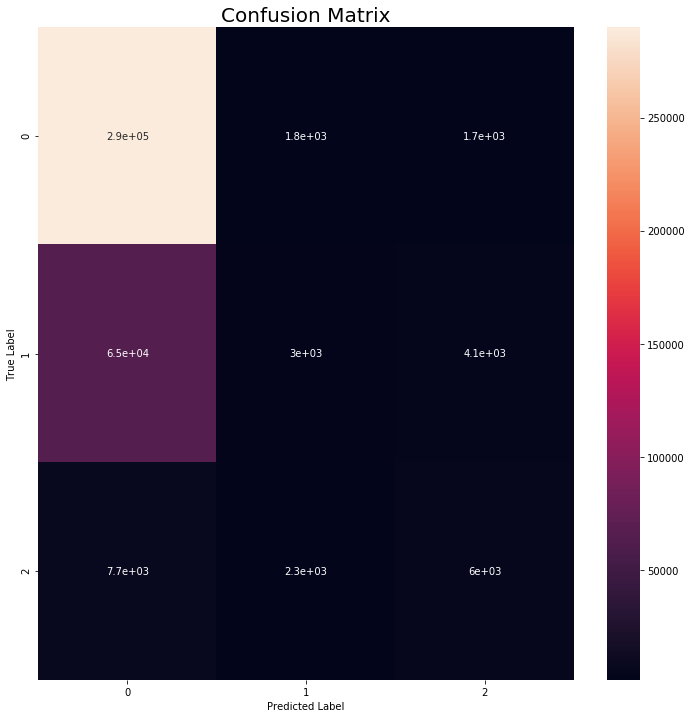

In [58]:
# Plot Heatmap
plt.figure(figsize=(12,12))
corr = sns.heatmap(confusion_matrix(y_test_without,log_reg_without_normal_pred), annot = True)
plt.title('Confusion Matrix',fontsize=20)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [59]:
print(classification_report(y_test_without,log_reg_without_normal_pred))

              precision    recall  f1-score   support

           1       0.80      0.99      0.88    293264
           2       0.43      0.04      0.08     72035
           3       0.51      0.37      0.43     15952

    accuracy                           0.78    381251
   macro avg       0.58      0.47      0.46    381251
weighted avg       0.72      0.78      0.71    381251



### Evaluation for Test Data
#### Without Feature Engineering
##### undersample

In [60]:
print("Accuracy: {:.3f} %".format(accuracy_score(y_test_without,log_reg_without_undersample_pred)*100))

Accuracy: 60.640 %


Text(87.0, 0.5, 'True Label')

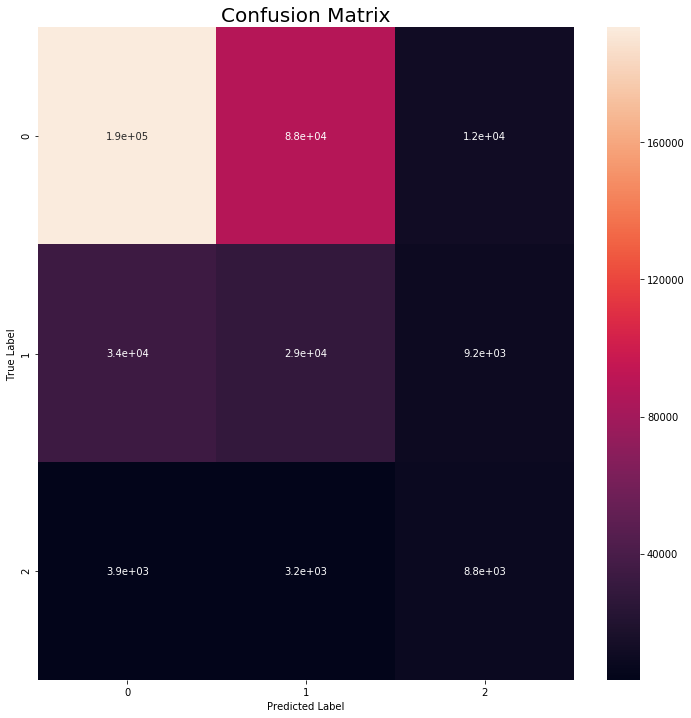

In [61]:
# Plot Heatmap
plt.figure(figsize=(12,12))
corr = sns.heatmap(confusion_matrix(y_test_without,log_reg_without_undersample_pred), annot = True)
plt.title('Confusion Matrix',fontsize=20)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [62]:
print(classification_report(y_test_without,log_reg_without_undersample_pred))

              precision    recall  f1-score   support

           1       0.84      0.66      0.74    293264
           2       0.24      0.40      0.30     72035
           3       0.30      0.55      0.39     15952

    accuracy                           0.61    381251
   macro avg       0.46      0.54      0.48    381251
weighted avg       0.70      0.61      0.64    381251



### Evaluation for Test Data
#### Without Feature Engineering
##### oversample

In [63]:
print("Accuracy: {:.3f} %".format(accuracy_score(y_test_without,log_reg_without_oversample_pred)*100))

Accuracy: 60.582 %


Text(87.0, 0.5, 'True Label')

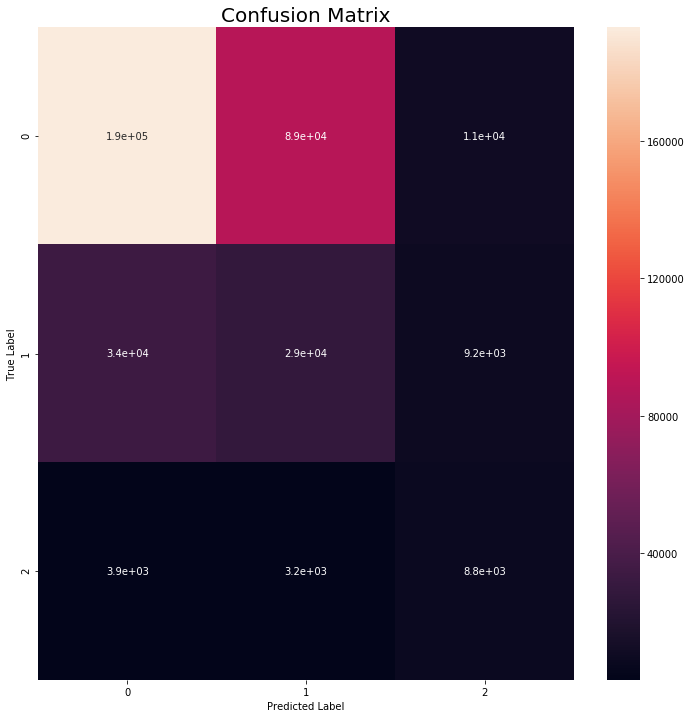

In [64]:
# Plot Heatmap
plt.figure(figsize=(12,12))
corr = sns.heatmap(confusion_matrix(y_test_without,log_reg_without_oversample_pred), annot = True)
plt.title('Confusion Matrix',fontsize=20)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [65]:
print(classification_report(y_test_without,log_reg_without_oversample_pred))

              precision    recall  f1-score   support

           1       0.84      0.66      0.74    293264
           2       0.24      0.40      0.30     72035
           3       0.30      0.55      0.39     15952

    accuracy                           0.61    381251
   macro avg       0.46      0.54      0.48    381251
weighted avg       0.70      0.61      0.64    381251



### Evaluation for Test Data
#### With Feature Engineering
##### imbalanced

In [66]:
print("Accuracy: {:.3f} %".format(accuracy_score(y_test_with,log_reg_with_normal_pred)*100))

Accuracy: 79.065 %


Text(87.0, 0.5, 'True Label')

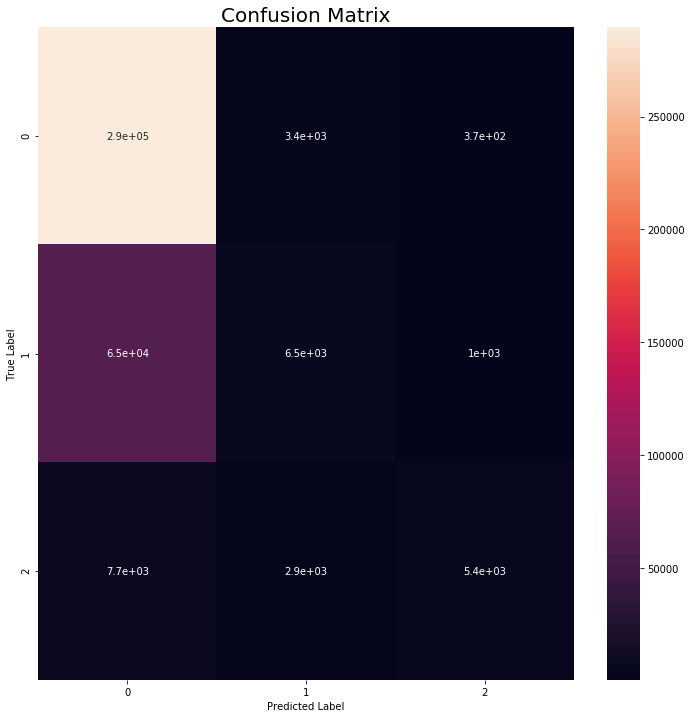

In [67]:
# Plot Heatmap
plt.figure(figsize=(12,12))
corr = sns.heatmap(confusion_matrix(y_test_with,log_reg_with_normal_pred), annot = True)
plt.title('Confusion Matrix',fontsize=20)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [68]:
print(classification_report(y_test_with,log_reg_with_normal_pred))

              precision    recall  f1-score   support

           1       0.80      0.99      0.88    293264
           2       0.51      0.09      0.15     72035
           3       0.80      0.34      0.48     15952

    accuracy                           0.79    381251
   macro avg       0.70      0.47      0.50    381251
weighted avg       0.75      0.79      0.73    381251



### Evaluation for Test Data
#### With Feature Engineering
##### undersample

In [69]:
print("Accuracy: {:.3f} %".format(accuracy_score(y_test_with,log_reg_with_undersample_pred)*100))

Accuracy: 63.649 %


Text(87.0, 0.5, 'True Label')

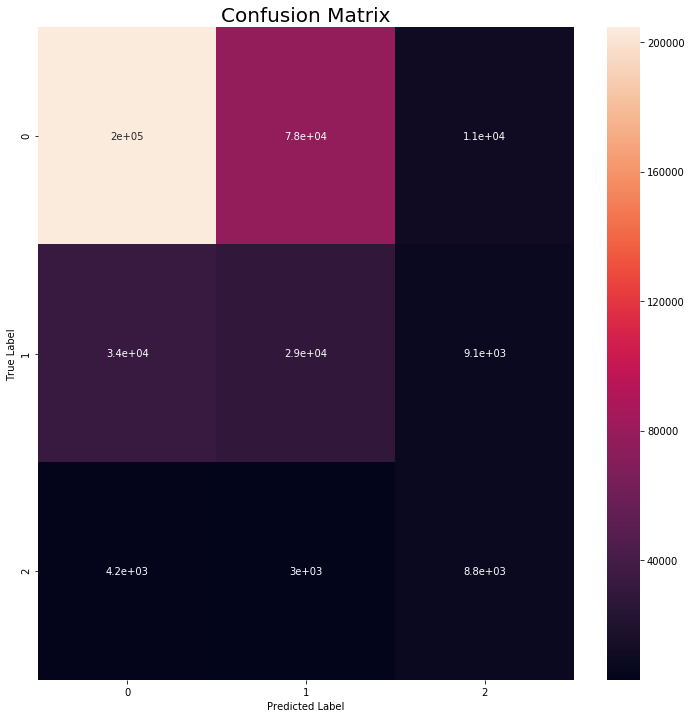

In [70]:
# Plot Heatmap
plt.figure(figsize=(12,12))
corr = sns.heatmap(confusion_matrix(y_test_with,log_reg_with_undersample_pred), annot = True)
plt.title('Confusion Matrix',fontsize=20)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [71]:
print(classification_report(y_test_with,log_reg_with_undersample_pred))

              precision    recall  f1-score   support

           1       0.84      0.70      0.76    293264
           2       0.27      0.41      0.32     72035
           3       0.30      0.55      0.39     15952

    accuracy                           0.64    381251
   macro avg       0.47      0.55      0.49    381251
weighted avg       0.71      0.64      0.66    381251



### Evaluation for Test Data
#### With Feature Engineering
##### oversample

In [72]:
print("Accuracy: {:.3f} %".format(accuracy_score(y_test_with,log_reg_with_oversample_pred)*100))

Accuracy: 64.047 %


Text(87.0, 0.5, 'True Label')

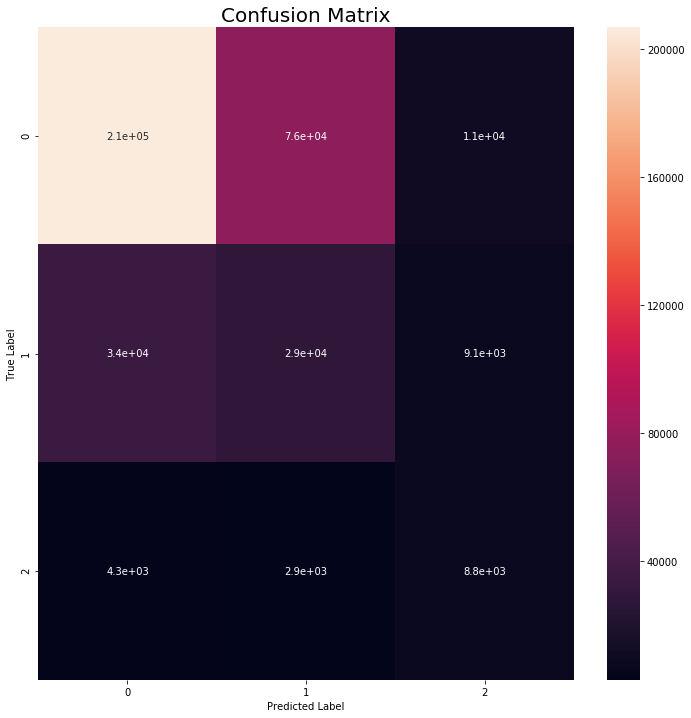

In [73]:
# Plot Heatmap
plt.figure(figsize=(12,12))
corr = sns.heatmap(confusion_matrix(y_test_with,log_reg_with_oversample_pred), annot = True)
plt.title('Confusion Matrix',fontsize=20)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [74]:
print(classification_report(y_test_with,log_reg_with_oversample_pred))

              precision    recall  f1-score   support

           1       0.84      0.70      0.77    293264
           2       0.27      0.40      0.32     72035
           3       0.30      0.55      0.39     15952

    accuracy                           0.64    381251
   macro avg       0.47      0.55      0.49    381251
weighted avg       0.71      0.64      0.67    381251



### Evaluation for Test Data
#### With Feature Engineering and External Data
##### imbalanced

In [75]:
print("Accuracy: {:.3f} %".format(accuracy_score(y_test_with_external,log_reg_with_external_normal_pred)*100))

Accuracy: 79.071 %


Text(87.0, 0.5, 'True Label')

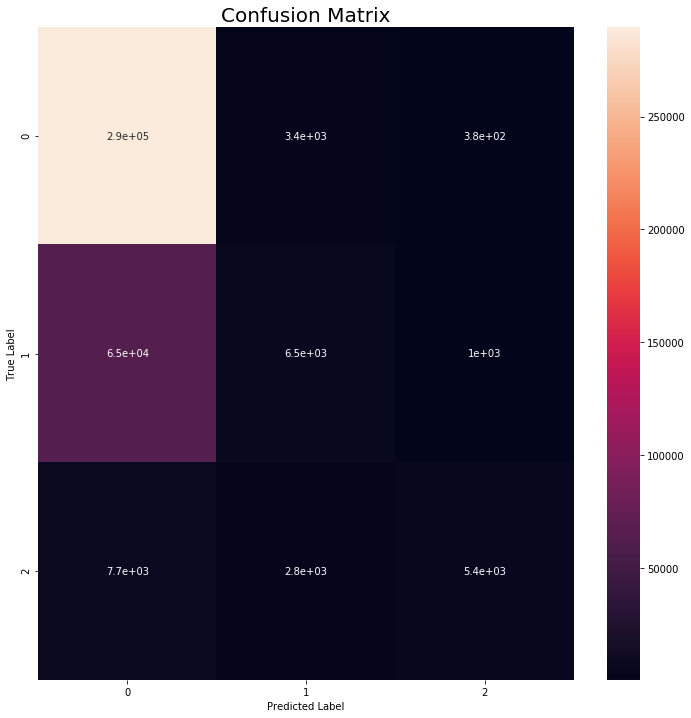

In [76]:
# Plot Heatmap
plt.figure(figsize=(12,12))
corr = sns.heatmap(confusion_matrix(y_test_with_external,log_reg_with_external_normal_pred), annot = True)
plt.title('Confusion Matrix',fontsize=20)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [77]:
print(classification_report(y_test_with_external,log_reg_with_external_normal_pred))

              precision    recall  f1-score   support

           1       0.80      0.99      0.88    293264
           2       0.51      0.09      0.15     72035
           3       0.80      0.34      0.48     15952

    accuracy                           0.79    381251
   macro avg       0.70      0.47      0.51    381251
weighted avg       0.75      0.79      0.73    381251



### Evaluation for Test Data
#### With Feature Engineering and External Data
##### undersample

In [78]:
print("Accuracy: {:.3f} %".format(accuracy_score(y_test_with_external,log_reg_with_external_undersample_pred)*100))

Accuracy: 63.527 %


Text(87.0, 0.5, 'True Label')

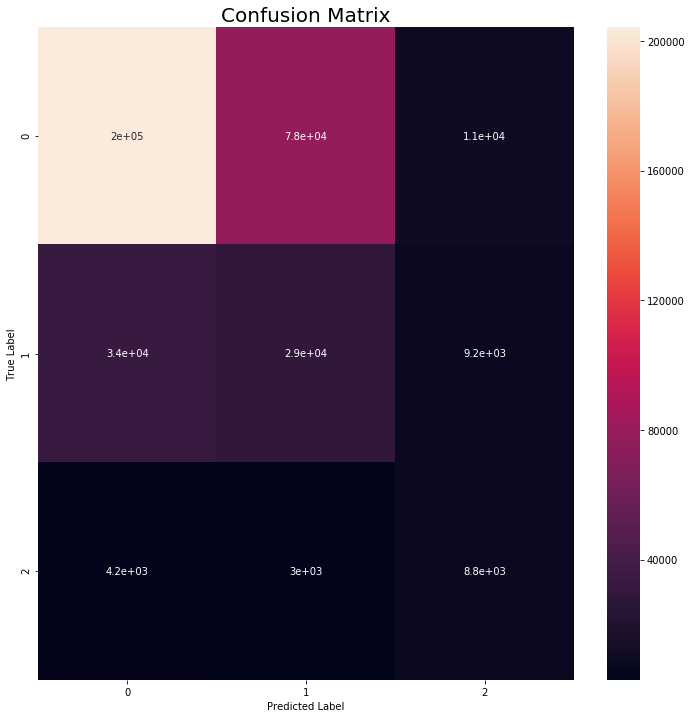

In [79]:
# Plot Heatmap
plt.figure(figsize=(12,12))
corr = sns.heatmap(confusion_matrix(y_test_with_external,log_reg_with_external_undersample_pred), annot = True)
plt.title('Confusion Matrix',fontsize=20)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [80]:
print(classification_report(y_test_with_external,log_reg_with_external_undersample_pred))

              precision    recall  f1-score   support

           1       0.84      0.70      0.76    293264
           2       0.27      0.41      0.32     72035
           3       0.30      0.55      0.39     15952

    accuracy                           0.64    381251
   macro avg       0.47      0.55      0.49    381251
weighted avg       0.71      0.64      0.66    381251



### Evaluation for Test Data
#### With Feature Engineering and External Data
##### oversample

In [81]:
print("Accuracy: {:.3f} %".format(accuracy_score(y_test_with_external,log_reg_with_external_oversample_pred)*100))

Accuracy: 63.978 %


Text(87.0, 0.5, 'True Label')

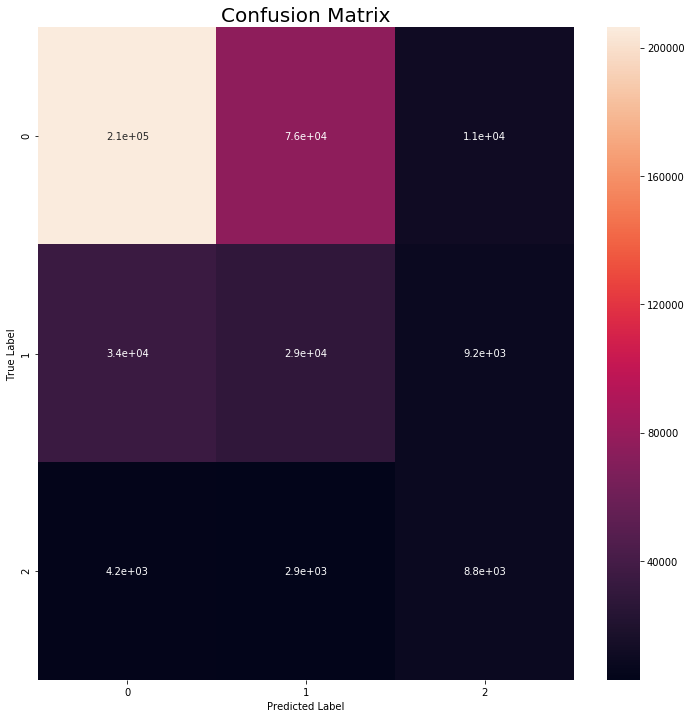

In [82]:
# Plot Heatmap
plt.figure(figsize=(12,12))
corr = sns.heatmap(confusion_matrix(y_test_with_external,log_reg_with_external_oversample_pred), annot = True)
plt.title('Confusion Matrix',fontsize=20)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [83]:
print(classification_report(y_test_with_external,log_reg_with_external_oversample_pred))

              precision    recall  f1-score   support

           1       0.84      0.70      0.77    293264
           2       0.27      0.40      0.32     72035
           3       0.30      0.55      0.39     15952

    accuracy                           0.64    381251
   macro avg       0.47      0.55      0.49    381251
weighted avg       0.71      0.64      0.67    381251

